# Plotting Sign distributions

This notebook contains code for:
- importing necessary libraries
- loading stored sign distributions
- making a scatterplot
- making other plots

In [14]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

## Saving all the Plots

Get all the sign distributions, create their plots and store them as images:

/net/projects/scratch/summer/valid_until_31_January_2025/epetersen/miniconda3/envs/thesis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/net/projects/scratch/summer/valid_until_31_January_2025/epetersen/miniconda3/envs/thesis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/net/projects/scratch/summer/valid_until_31_January_2025/epetersen/miniconda3/envs/thesis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mo

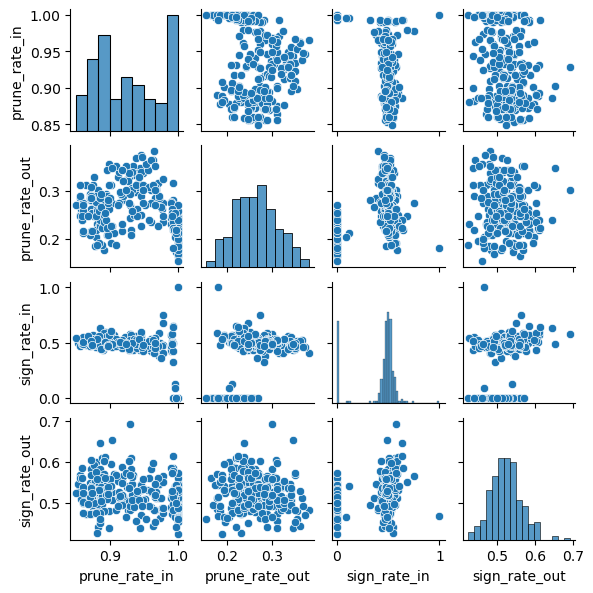

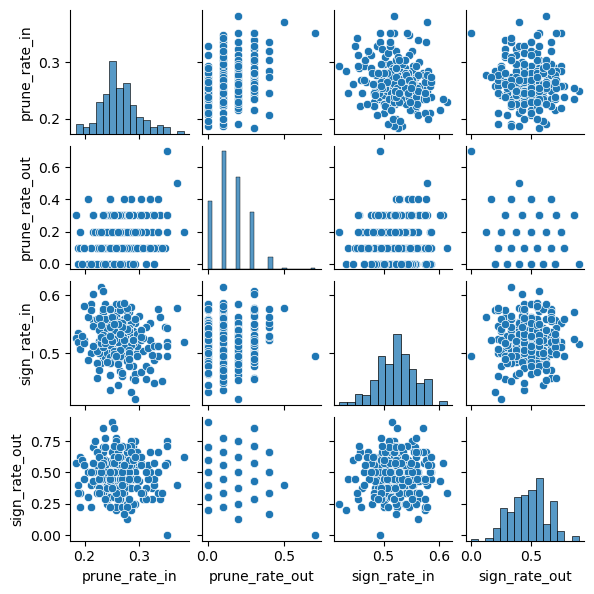

In [17]:
# get sign distribution of each single WT and store plot

def store_sign_distr_plots(n, name):

    for i in range(n):
        sign_distr = pd.read_csv(f'2b Sign distributions/{name}_{i}_sign_distr.csv')
        sign_distr_layer1 = sign_distr[sign_distr["layer"]=="dense1"][["prune_rate_in", "prune_rate_out", "sign_rate_in", "sign_rate_out"]]
        sign_distr_layer2 = sign_distr[sign_distr["layer"]=="dense2"][["prune_rate_in", "prune_rate_out", "sign_rate_in", "sign_rate_out"]]
        sns.pairplot(sign_distr_layer1, height=1.5).savefig(f"3b Plots/{name}_dense1_{i}_sign_distr.png")
        sns.pairplot(sign_distr_layer2, height=1.5).savefig(f"3b Plots/{name}_dense2_{i}_sign_distr.png")

def store_collective_sign_distr_plots(n, name):

    coll_sign_distr = pd.DataFrame()
    for i in range(n):
        sign_distr = pd.read_csv(f'2b Sign distributions/{name}_{i}_sign_distr.csv')
        coll_sign_distr = pd.concat([coll_sign_distr, sign_distr])

    coll_sign_distr_layer1 = coll_sign_distr[coll_sign_distr["layer"]=="dense1"][["prune_rate_in", "prune_rate_out", "sign_rate_in", "sign_rate_out"]]
    coll_sign_distr_layer2 = coll_sign_distr[coll_sign_distr["layer"]=="dense2"][["prune_rate_in", "prune_rate_out", "sign_rate_in", "sign_rate_out"]]

    sns.pairplot(coll_sign_distr_layer1, height=1.5).savefig(f"3b Plots/{name}_dense1_all_sign_distr.png")
    sns.pairplot(coll_sign_distr_layer2, height=1.5).savefig(f"3b Plots/{name}_dense2_all_sign_distr.png")




store_sign_distr_plots(1, "SVHN_IMP")

## Inspecting the data:

In [4]:
cifar_imp_0_sign_distr = pd.read_csv('2b Sign distributions/CIFAR_IMP_0_sign_distr.csv')
random_sign_distr = pd.read_csv('2b Sign distributions/random_sign_distr.csv')

In [5]:
cifar_imp_0_sign_distr.head() 

,pos_in,pos_out,neg_in,neg_out,prune_rate_in,prune_rate_out,sign_rate_in,sign_rate_out,layer
0,794,96,625,104,0.913391,0.218750,0.559549,0.480000,dense1
1,912,102,870,96,0.891235,0.226562,0.511785,0.515152,dense1
2,938,81,858,111,0.890381,0.250000,0.522272,0.421875,dense1
3,756,100,620,74,0.916016,0.320312,0.549419,0.574713,dense1
4,402,86,426,79,0.949463,0.355469,0.485507,0.521212,dense1


In [6]:
random_sign_distr.head()

,pos_in,pos_out,neg_in,neg_out,prune_rate_in,prune_rate_out,sign_rate_in,sign_rate_out,layer
0,535,84,580,98,0.931946,0.289062,0.479821,0.461538,dense1
1,568,94,547,87,0.931946,0.292969,0.509417,0.519337,dense1
2,597,86,573,100,0.928589,0.273438,0.510256,0.462366,dense1
3,555,98,549,94,0.932617,0.250000,0.502717,0.510417,dense1
4,598,98,571,98,0.928650,0.234375,0.511548,0.500000,dense1


Choose layers and statistic for the scatterplot:

In [7]:
#WT_data = isabels_sign_distr[["prune_rate_in", "prune_rate_out", "sign_rate_in", "sign_rate_out"]]
wt_data = cifar_imp_0_sign_distr[cifar_imp_0_sign_distr["layer"]=="dense1"][["prune_rate_in", "prune_rate_out", "sign_rate_in", "sign_rate_out"]]
#WT_data = isabels_sign_distr[["pos_in", "pos_out", "neg_in", "neg_out"]]
#WT_data = isabels_sign_distr[isabels_sign_distr["layer"]=="dense1"][["pos_in", "pos_out", "neg_in", "neg_out"]]

In [8]:
#RSN_data = random_sign_distr[["prune_rate_in", "prune_rate_out", "sign_rate_in", "sign_rate_out"]]
rsn_data = random_sign_distr[random_sign_distr["layer"]=="dense1"][["prune_rate_in", "prune_rate_out", "sign_rate_in", "sign_rate_out"]]
#RSN_data = random_sign_distr[["pos_in", "pos_out", "neg_in", "neg_out"]]
#RSN_data = random_sign_distr[random_sign_distr["layer"]=="dense1"][["pos_in", "pos_out", "neg_in", "neg_out"]]

---
Looking at joint sign distribution of multiple models

In [9]:
coll_sign_distr = create_collective_sign_distr(10, "CIFAR_IMP")

In [10]:
coll_sign_distr.head()

,pos_in,pos_out,neg_in,neg_out,prune_rate_in,prune_rate_out,sign_rate_in,sign_rate_out,layer
0,794,96,625,104,0.913391,0.218750,0.559549,0.480000,dense1
1,912,102,870,96,0.891235,0.226562,0.511785,0.515152,dense1
2,938,81,858,111,0.890381,0.250000,0.522272,0.421875,dense1
3,756,100,620,74,0.916016,0.320312,0.549419,0.574713,dense1
4,402,86,426,79,0.949463,0.355469,0.485507,0.521212,dense1


In [11]:
# filtering the data

wt_all_data = coll_sign_distr[coll_sign_distr["layer"]=="dense1"]
wt_all_data = wt_all_data[wt_all_data["prune_rate_in"] != 1.0]
wt_all_data = wt_all_data[wt_all_data["prune_rate_out"] != 1.0]
wt_all_data = wt_all_data[["prune_rate_in", "prune_rate_out", "sign_rate_in", "sign_rate_out"]]

Choose seaborn or pandas plot:

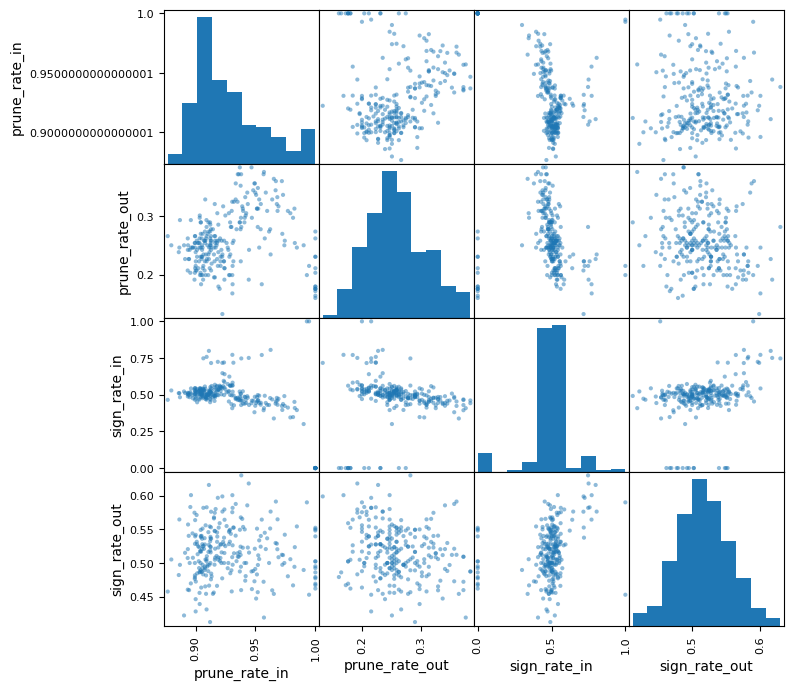

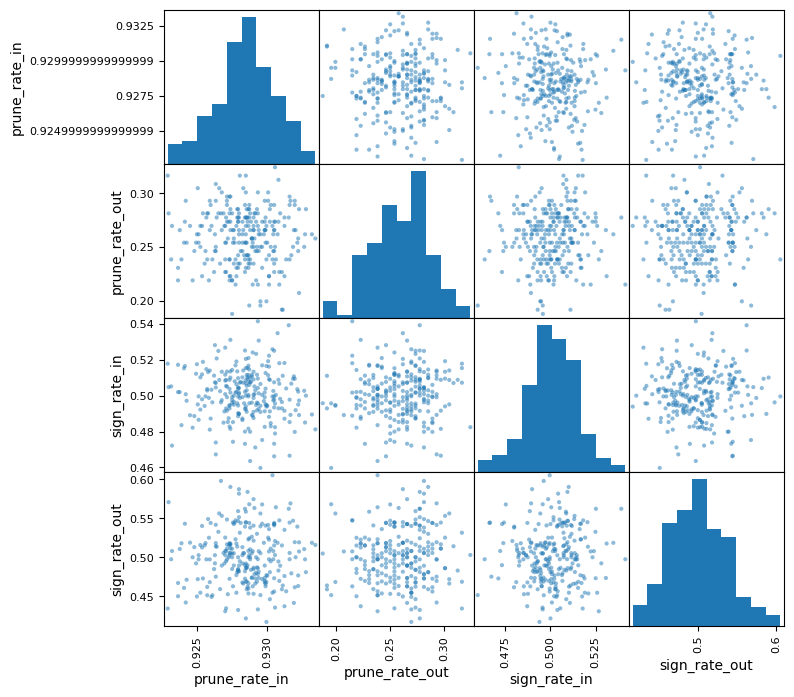

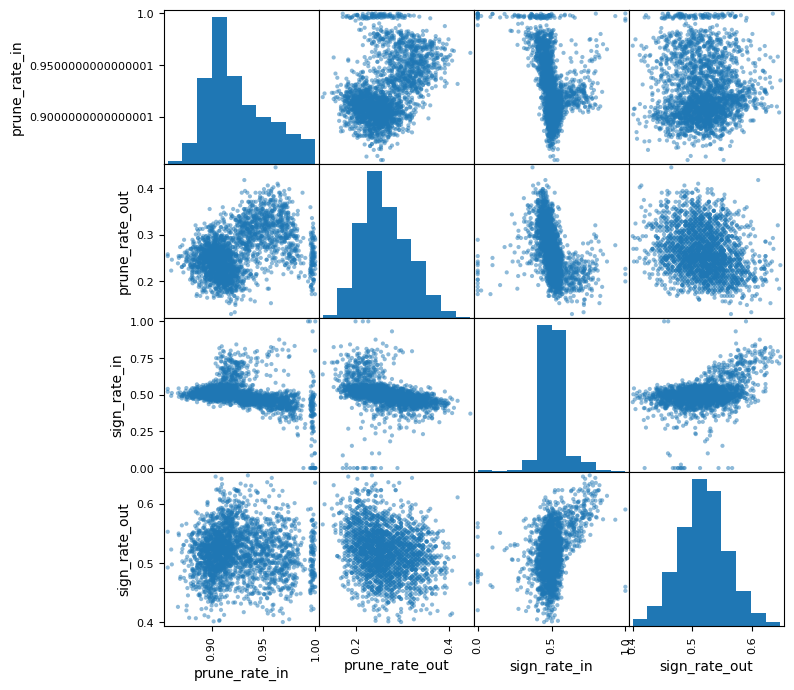

In [12]:
plot=pd.plotting.scatter_matrix(wt_data, figsize=(8,8))
plot=pd.plotting.scatter_matrix(rsn_data, figsize=(8,8))
plot=pd.plotting.scatter_matrix(wt_all_data, figsize=(8,8))

/net/projects/scratch/summer/valid_until_31_January_2025/epetersen/miniconda3/envs/thesis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/net/projects/scratch/summer/valid_until_31_January_2025/epetersen/miniconda3/envs/thesis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/net/projects/scratch/summer/valid_until_31_January_2025/epetersen/miniconda3/envs/thesis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mo

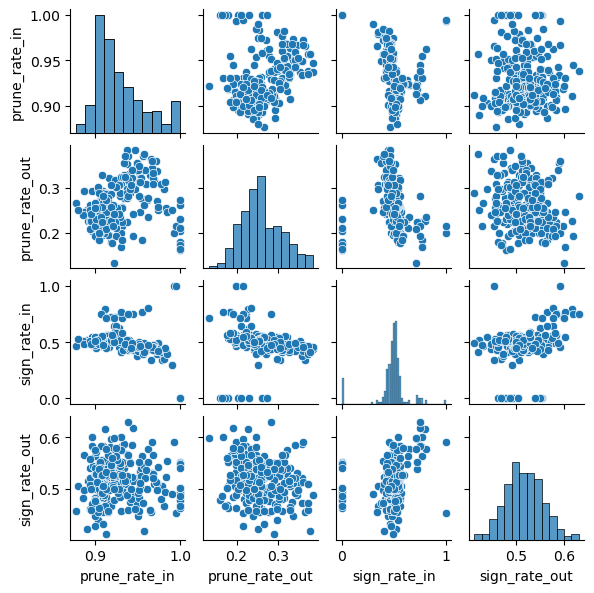

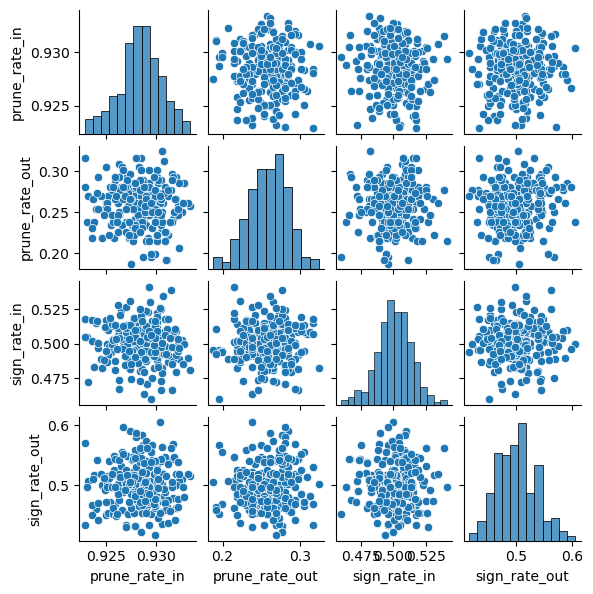

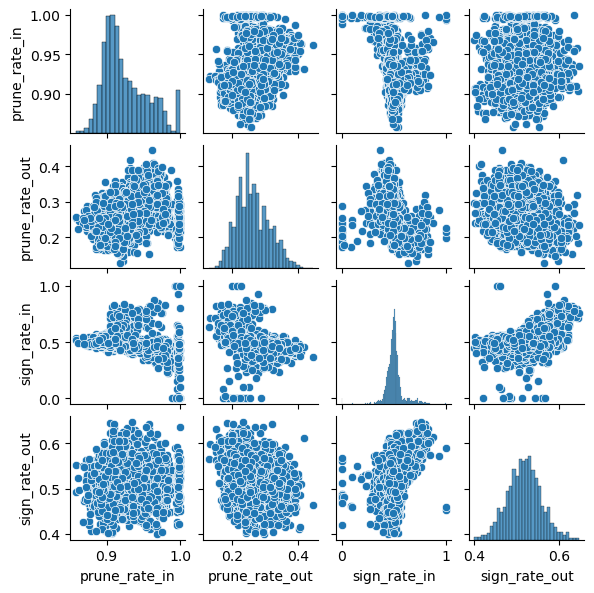

In [13]:
sns.pairplot(wt_data, height=1.5)#.savefig("3b Plots/CIFAR_IMP_0_sign_distr.png")
sns.pairplot(rsn_data, height=1.5)#.savefig("3b Plots/random_ticket_sign_distr.png")
sns.pairplot(wt_all_data, height=1.5)#.savefig("3b Plots/CIFAR_IMP_all_sign_distr.png")

### Observations:

- prune rate in has a larger low cluster and a smaller high cluster
- prune rate out is more varied
- sign rate in is very focused at 0.5 (a balanced sign ratio)
- sign rate out is more spread out with a bit more positive signs
- the more the ingoing connections are pruned, the more their signs are unbalanced.
- the same goes for outgoing connections, though they seem to be less strict with this
